**Creating final data for crop and fertilizer recommendation system**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
fertilizer_data_path = '../Data-raw/FertilizerData.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

In [ ]:
merge_fert.head()

Unnamed: 0	Crop	N	P	K	pH
0	0	rice	80	40	40	5.5
1	3	maize	80	40	20	5.5
2	5	chickpea	40	60	80	5.5
3	12	kidneybeans	20	60	20	5.5
4	13	pigeonpeas	20	60	20	5.5

In [ ]:
del merge_fert['Unnamed: 0']

In [ ]:
merge_fert.describe()

N	P	K	pH
count	22.000000	22.000000	22.000000	22.000000
mean	50.454545	45.681818	48.181818	5.409091
std	36.315715	32.634172	51.698426	0.590326
min	20.000000	10.000000	10.000000	4.000000
25%	20.000000	20.000000	20.000000	5.500000
50%	30.000000	40.000000	30.000000	5.500000
75%	80.000000	60.000000	50.000000	5.500000
max	120.000000	125.000000	200.000000	6.500000

In [ ]:
merge_fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
plt.plot(merge_fert["N"])

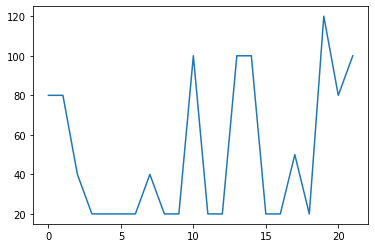

In [ ]:
plt.plot(merge_fert["P"])

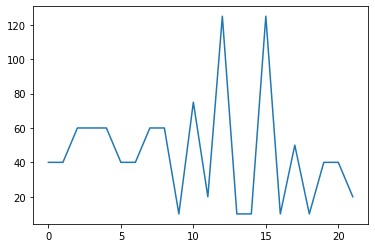

In [ ]:
plt.plot(merge_fert["K"])

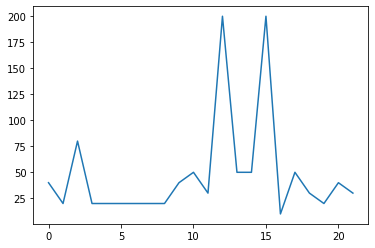

In [ ]:
sns.heatmap(merge_fert.corr(),annot=True)

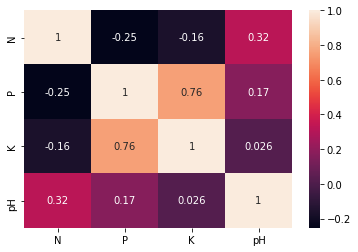

In [ ]:
merge_crop = pd.read_csv('../Data-raw/MergeFileCrop.csv')
reco_fert = merge_fert

In [ ]:
#Add +/-3 for every NPK value
import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    #print(crop)
    N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20,20)
    P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5,20)
    K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    #print(d)
    temp = temp.append(d,ignore_index = True)

In [ ]:
temp

N	P	K
0	90	42	43
1	85	58	41
2	60	55	44
3	74	35	40
4	78	42	42
...	...	...	...
2195	107	34	32
2196	99	15	27
2197	118	33	30
2198	117	32	34
2199	104	18	30
2200 rows × 3 columns

In [ ]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [ ]:
merge_crop

Unnamed: 0	temperature	humidity	ph	rainfall	label	N	P	K
0	0	20.879744	82.002744	6.502985	202.935536	rice	90	42	43
1	1	21.770462	80.319644	7.038096	226.655537	rice	85	58	41
2	2	23.004459	82.320763	7.840207	263.964248	rice	60	55	44
3	3	26.491096	80.158363	6.980401	242.864034	rice	74	35	40
4	4	20.130175	81.604873	7.628473	262.717340	rice	78	42	42
...	...	...	...	...	...	...	...	...	...
2195	895	26.774637	66.413269	6.780064	177.774507	coffee	107	34	32
2196	896	27.417112	56.636362	6.086922	127.924610	coffee	99	15	27
2197	897	24.131797	67.225123	6.362608	173.322839	coffee	118	33	30
2198	898	26.272418	52.127394	6.758793	127.175293	coffee	117	32	34
2199	899	23.603016	60.396475	6.779833	140.937041	coffee	104	18	30
2200 rows × 9 columns

In [ ]:
del merge_crop['Unnamed: 0']

In [ ]:
merge_crop

temperature	humidity	ph	rainfall	label	N	P	K
0	20.879744	82.002744	6.502985	202.935536	rice	90	42	43
1	21.770462	80.319644	7.038096	226.655537	rice	85	58	41
2	23.004459	82.320763	7.840207	263.964248	rice	60	55	44
3	26.491096	80.158363	6.980401	242.864034	rice	74	35	40
4	20.130175	81.604873	7.628473	262.717340	rice	78	42	42
...	...	...	...	...	...	...	...	...
2195	26.774637	66.413269	6.780064	177.774507	coffee	107	34	32
2196	27.417112	56.636362	6.086922	127.924610	coffee	99	15	27
2197	24.131797	67.225123	6.362608	173.322839	coffee	118	33	30
2198	26.272418	52.127394	6.758793	127.175293	coffee	117	32	34
2199	23.603016	60.396475	6.779833	140.937041	coffee	104	18	30
2200 rows × 8 columns

In [ ]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [ ]:
merge_crop.to_csv("../Data-processed/crop_recommendation.csv",index=False)

In [ ]:
# Checking if everything went fine
df = pd.read_csv('../Data-processed/crop_recommendation.csv')


In [ ]:
df.head()

N	P	K	temperature	humidity	ph	rainfall	label
0	90	42	43	20.879744	82.002744	6.502985	202.935536	rice
1	85	58	41	21.770462	80.319644	7.038096	226.655537	rice
2	60	55	44	23.004459	82.320763	7.840207	263.964248	rice
3	74	35	40	26.491096	80.158363	6.980401	242.864034	rice
4	78	42	42	20.130175	81.604873	7.628473	262.717340	rice

In [ ]:
df.shape

(2200, 8)